# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import wrangle as wrg
import env
import explore

import sklearn.linear_model as skl
from sklearn.linear_model import LogisticRegression

#### Our Telco scenario continues:

As a customer analyst for Telco, you want to know who has spent the most money with the company over their lifetime. You have monthly charges and tenure, so you think you will be able to use those two attributes as features to estimate total charges. You need to do this within an average of $5.00 per customer.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

In [2]:
df = wrg.get_telco_data()
df.head(3)

Reading from csv file...


,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check


In [3]:
df = wrg.prep_telco(df)

In [4]:
df.head(3)

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,0,9,65.6,593.30,0,1,1,1,0,...,0,1,0,1,0,0,0,0,0,1
1,0003-MKNFE,0,9,59.9,542.40,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,0004-TLHLJ,0,4,73.9,280.85,1,0,0,1,0,...,0,1,1,0,0,1,0,0,1,0


### Exercise 3 cut in

In [5]:
# Make a function to add a new column that translate tenure months to years

def months_to_years(df):
    '''
    A function to add a new column that translate tenure months to years
    '''
    df['tenure_years'] = round(df.tenure // 12)
    
    return df

df = months_to_years(df)
    

In [6]:
df.head(1)

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,...,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,tenure_years
0,0002-ORFBO,0,9,65.6,593.3,0,1,1,1,0,...,1,0,1,0,0,0,0,0,1,0


# Exercise 1

- Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [7]:
train, validate, test = wrg.split_data(df)

train <> (3937, 33)
validate <> (1688, 33)
test <> (1407, 33)


# Exercise 2

- Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [8]:
# Per the questions asked, were looking at specific features

features = ['monthly_charges', 'tenure', 'total_charges']


In [9]:
# Write the function

def plot_variable_pairs(train, columns, hue=None):
    '''
    The function takes in a df and a list of columns from the df
    and displays a pair plot wid a regression line.
    '''
    
    kws = {'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}}
    sns.pairplot(train[columns],  kind="reg", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}})
    plt.show()

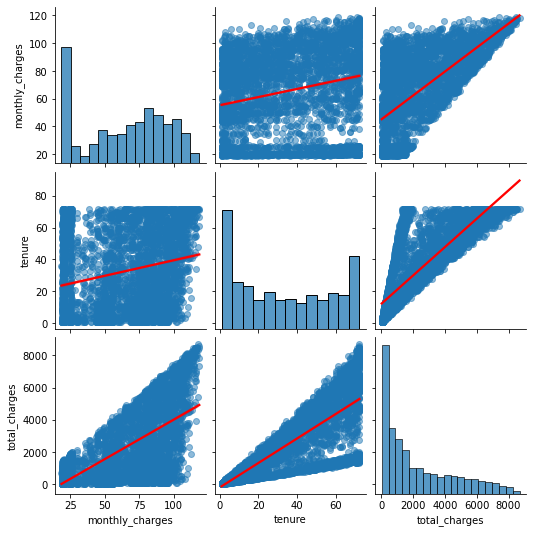

In [10]:
# Test it out
plot_variable_pairs(train, features)

# Exercise 3

- Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

In [11]:
# I feel like this should be done before I split my data, so I'm going to go back and put this in before my split

In [12]:
train.head(3)

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,...,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,tenure_years
299,0440-MOGPM,0,41,80.55,3263.90,0,0,0,1,0,...,1,0,1,0,0,0,0,1,0,3
5091,7153-OANIO,0,1,69.95,69.95,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
5136,7233-IOQNP,0,43,34.00,1505.35,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,3


# Exercise 4

- Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [13]:
# 

def plot_categorical_and_continuous_vars(df, cat_var, cont_var):
    '''
    This function accepts your dataframe and the name of the columns that hold 
    the continuous and categorical features and outputs 3 different plots 
    for visualizing a categorical variable and a continuous variable.
    '''
    
    # Title
    plt.suptitle(f'{cont_var} by {cat_var}')
                 
    # Lineplot
    sns.lineplot(x=cat_var, y=cont_var, data=train)
    plt.xlabel(cat_var)
    plt.ylabel(cont_var)
    
    # Swarm Plot
    sns.catplot(x=cat_var, y=cont_var, data=train, kind='swarm')
    plt.xlabel(cat_var)
    plt.ylabel(cont_var)
    
    # Box Plot
    sns.catplot(x=cat_var, y=cont_var, data=train, kind='box')
    plt.xlabel(cat_var)
    plt.ylabel(cont_var)
    
    # Bar Plot
    sns.catplot(x=cat_var, y=cont_var, data=train, kind='bar')
    plt.xlabel(cat_var)
    plt.ylabel(cont_var)
    
    # Scatter plot with regression line
    sns.lmplot(x=cat_var, y=cont_var, data=train)
    plt.xlabel(cat_var)
    plt.ylabel(cont_var)
    
    plt.show()

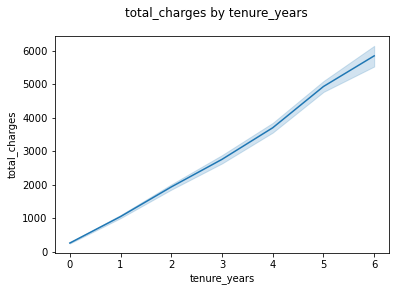

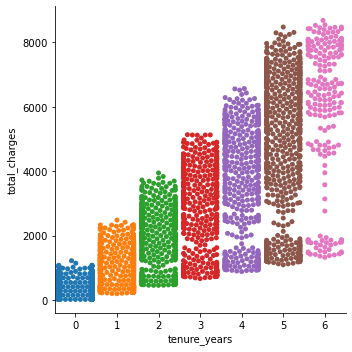

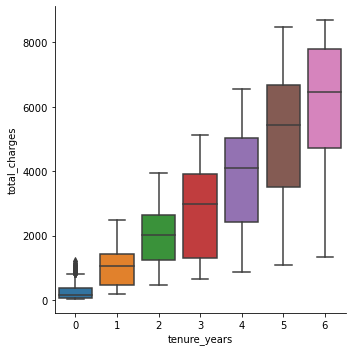

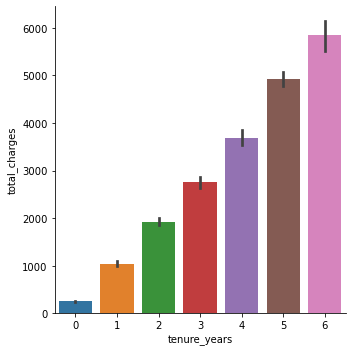

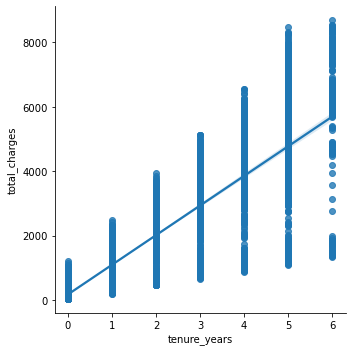

In [14]:
plot_categorical_and_continuous_vars(train, 'tenure_years', 'total_charges')

In [15]:
# It works!!!

# Lets make a function that explores data using heatmaps

def plot_coef_heatmap(x_train, y_train, df):
    '''
    Takes in a dataframe and gives a heatmap of the feature coefficients
    '''
    
    logit = LogisticRegression(random_state=1313)

    logit.fit(x_train, y_train)

    features = df.columns.tolist()
    
    weights = logit.coef_.flatten()
    
    visualize = pd.DataFrame(weights, features).reset_index().rename(columns={'index':'feature', 
                                                                          0: 'weights'})

    # Apply coefficients to a heatmap
    plt.figure()
    sns.heatmap(visualize)

# Exercise 5 & 6

- Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

- Explore your dataset with any other visualizations you think will be helpful.

In [ ]:
# Pull data for mall customers to explore

url = f"mysql+pymysql://{env.user}:{env.password}@{env.host}/mall_customers"

query = '''
        SELECT *
        FROM customers
        '''

df = pd.read_sql(query, url)
df.head()

In [ ]:
# Split into train, validate, test
train, validate, test = wrg.split_data(df)

In [ ]:
# Make a list of columns to explore
cats = ['age', 'annual_income', 'spending_score']

# Visualize
explore.plot_variable_pairs(train, cats)

In [ ]:
explore.plot_categorical_and_continuous_vars('age', 'spending_score', train)

# Exercise 7 (Done Above)

- In a seperate notebook, use the functions you have developed in this exercise with the mall_customers dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make spending_score your target variable.


-------------------------------------------------------


# Extended Exercises

#### Our Zillow scenario continues:

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

## Exercise 1

- Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.